In [263]:
import ccxt
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy.interpolate import interp1d
from talib import RSI, EMA
import warnings
warnings.filterwarnings('ignore')

**Load historical XBTUSD market data**

The Open, High, Low, Close (OHLC or candle) data here ranges from 01-Jan-2019 to 01-Nov-2020

In [264]:
df = pd.read_parquet(r'C:\Users\Nomade05\Elie code\Datas\XBTUSD.parquet')

print(f'{len(df)} market data points')
df.head()

966240 market data points


,time,open,high,low,close,vol
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0


## RSI  

- The relative strength index (RSI) is a popular momentum oscillator introduced in 1978.
- The RSI provides technical traders with signals about bullish and bearish price momentum
- An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.
- The RSI line crossing below the overbought line or above oversold line is often seen by traders as a signal to buy or sell.
- The RSI works best in trading ranges rather than trending markets.

**Calculate RSI TA-Lib package**  

Use default 14 time period for Relative Strenght Index (RSI)

In [265]:
df['rsi'] = RSI(df['close'])
df.head(20)

,time,open,high,low,close,vol,rsi
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0,NaN
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0,NaN
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0,NaN
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0,NaN
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0,NaN
5,2019-01-01 00:06:00,3688.5,3689.0,3688.5,3688.5,105867.0,NaN
6,2019-01-01 00:07:00,3688.5,3689.0,3686.0,3686.0,883486.0,NaN
7,2019-01-01 00:08:00,3686.0,3686.5,3684.5,3684.5,334053.0,NaN
8,2019-01-01 00:09:00,3684.5,3685.0,3684.5,3685.0,62139.0,NaN
9,2019-01-01 00:10:00,3685.0,3685.5,3684.5,3685.5,681316.0,NaN


**Distribution of RSI**

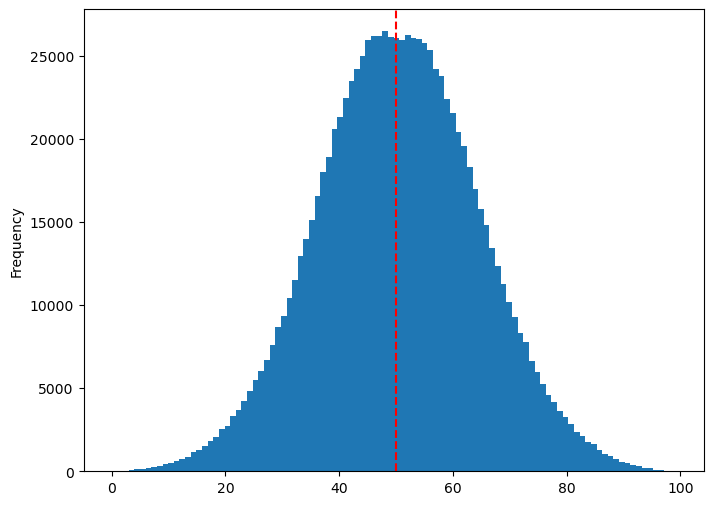

In [266]:
df['rsi'].plot(kind='hist', bins=100, figsize=(8, 6))
plt.axvline(50, color='red', linestyle='--')

**Plot close price vs RSI for a time period**

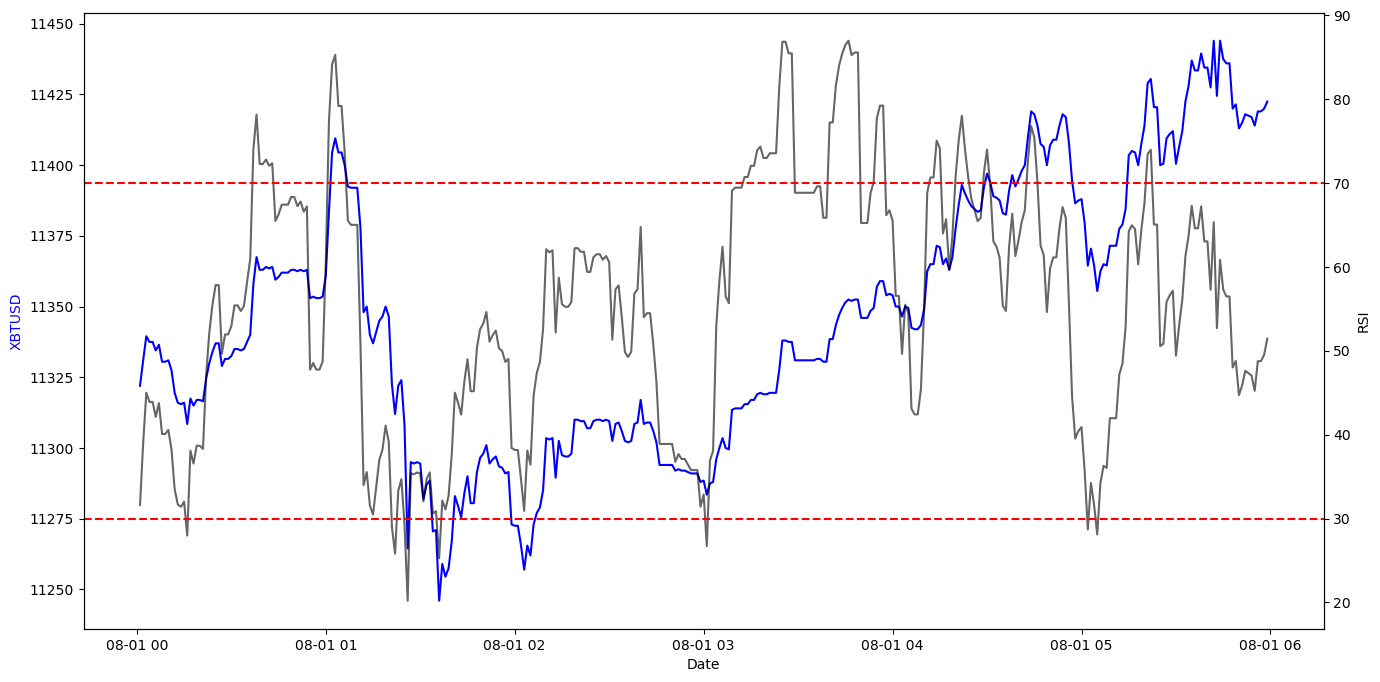

In [267]:
start_time = datetime.datetime(2020, 8, 1, 0)
end_time = datetime.datetime(2020, 8, 1, 6)

xf = df[(df['time'] > start_time) & (df['time'] < end_time)]

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(xf['time'], xf['close'], 'b-')
ax2.plot(xf['time'], xf['rsi'], 'k-', alpha=0.6)

ax1.set_xlabel('Date')
ax1.set_ylabel('XBTUSD', color='b')
ax2.set_ylabel('RSI', color='k')

ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

**Trade programmatically using CCXT library**

In [268]:
API = ccxt.bitmex({
    'apiKey': 'bS6EY-LNN5Rg8z0euvhPsuSf',
    'secret':'uL2VP-r-V1VVMfK7U-8x6Q02j-MoHRZHHUXDCpfd0RMqjhLg',
})

**Load historical candle data from API**

In [269]:
candles = API.publicGetTradeBucketed(params={
    'binSize': '1m',
    'symbol': 'XBTUSD',
    'reverse': True
})

candles[:2]

[{'timestamp': '2023-04-21T14:46:00.000Z',
  'symbol': 'XBTUSD',
  'open': '28066.5',
  'high': '28080.5',
  'low': '28044',
  'close': '28067.5',
  'trades': '294',
  'volume': '2399700',
  'vwap': '28056',
  'lastSize': '100',
  'turnover': '8553259871',
  'homeNotional': '85.53259871',
  'foreignNotional': '2399700'},
 {'timestamp': '2023-04-21T14:45:00.000Z',
  'symbol': 'XBTUSD',
  'open': '28108',
  'high': '28111',
  'low': '28064.5',
  'close': '28066.5',
  'trades': '240',
  'volume': '1462800',
  'vwap': '28089.55',
  'lastSize': '100',
  'turnover': '5207627474',
  'homeNotional': '52.076274739999995',
  'foreignNotional': '1462800'}]

**RSI strategy idea**

In [270]:
def iso_to_unix(ts):
    return round(1000 * dateutil.parser.parse(ts).timestamp())

candle = {iso_to_unix(c['timestamp']): c['close'] for c in candles}
times, closes = zip(*sorted(candle.items()))

In [271]:
def hypo_rsi(closes, ret):
    return RSI(np.append(np.float64(closes), [np.float64(closes[-1]) * (1 + ret)]))[-1]


returns = np.linspace(-.02, .02, 100)
rsi_data = [hypo_rsi(closes, r) for r in returns]

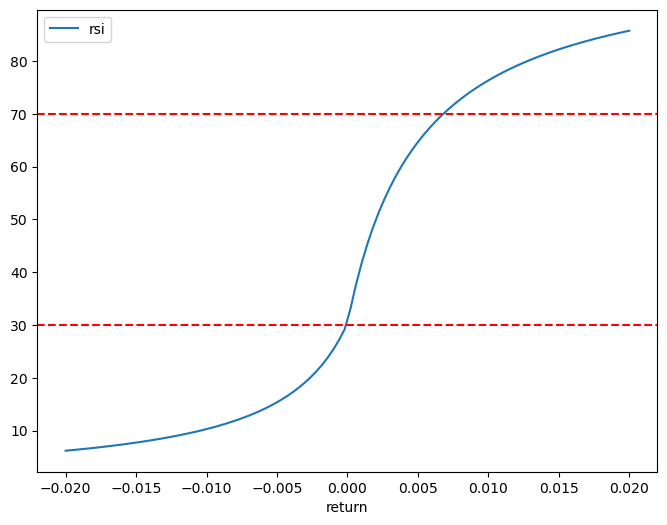

In [272]:
rsi = pd.DataFrame({'return': returns, 'rsi': rsi_data})

rsi.plot(x='return', y='rsi', figsize=(8, 6))
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')

**Get all open positions**

In [273]:
risk = API.privateGetPosition()

risk

[]

**Place oder in the market**

In [274]:
# payload = {'orders': [{
    #'symbol': 'XBTUSD',
    #'price': 15329,
    #'orderQty': -200,
    #'ordType': 'Limit',
    #'execInst': 'ParticipateDoNotInitiate'
#}]}

# API.privatePostOrderBulk(payload)

**Cancel all open orders**

In [275]:
# API.privateDeleteOrderAll()

## Model improvement idea: use exponential moving average (EMA)  
- Only place a sell order if 5 period EMA is below 20 period EMA
- Only place a buy order if 5 period EMA is above 20 period EMA

In [276]:
df['rsi_5'] = EMA(df['close'], 5)
df['rsi_20'] = EMA(df['close'], 20)

df.columns = df.columns.str.replace('rsi_5', 'EMA_5')
df.columns = df.columns.str.replace('rsi_20', 'EMA_20')

df['signal'] = df.apply(lambda x: x['EMA_5'] - x['EMA_20'], axis = 1)


df = df.tail(400)
df.reset_index(inplace=True, drop=True)
df

,time,open,high,low,close,vol,rsi,EMA_5,EMA_20,signal
0,2020-11-01 17:21:00,13799.5,13802.0,13799.5,13802.0,172459.0,60.631853,13796.087449,13790.970633,5.116816
1,2020-11-01 17:22:00,13802.0,13802.0,13799.0,13799.0,464971.0,57.244858,13797.058299,13791.735334,5.322965
2,2020-11-01 17:23:00,13799.0,13801.5,13799.0,13801.0,60289.0,58.893468,13798.372199,13792.617684,5.754516
3,2020-11-01 17:24:00,13801.0,13801.5,13800.5,13800.5,278579.0,58.288356,13799.081466,13793.368380,5.713086
4,2020-11-01 17:25:00,13800.5,13801.0,13800.0,13800.5,426900.0,58.288356,13799.554311,13794.047582,5.506729
...,...,...,...,...,...,...,...,...,...,...
395,2020-11-01 23:56:00,13737.5,13746.0,13737.5,13746.0,2356171.0,69.647809,13734.370358,13726.081795,8.288563
396,2020-11-01 23:57:00,13746.0,13760.0,13743.5,13749.5,2022692.0,71.460685,13739.413572,13728.312100,11.101472
397,2020-11-01 23:58:00,13749.5,13752.5,13750.0,13750.5,656155.0,71.975712,13743.109048,13730.425233,12.683815
398,2020-11-01 23:59:00,13750.5,13760.0,13750.0,13760.0,535721.0,76.343356,13748.739365,13733.241878,15.497488


In [277]:
def strategy(close, signal):
    buy_price = []
    sell_price = []
    EMA_signal = []
    
    
    for i in range(0,len(df)-1):
        
        if df['signal'][i] > 0 and df['signal'][i+1] < 0:
            sell_price.append(df['close'][i])
            buy_price.append(np.nan)            
            EMA_signal.append(df['signal'][i])            
        
                
        if df['signal'][i] < 0 and df['signal'][i+1] > 0:           
            sell_price.append(np.nan)
            buy_price.append(df['close'][i])            
            EMA_signal.append(df['signal'][i])  
            
        if df['signal'][i] < 0 and df['signal'][i+1] < 0:           
            sell_price.append(np.nan)
            buy_price.append(np.nan)            
            EMA_signal.append(np.nan)  
        
        if df['signal'][i] > 0 and df['signal'][i+1] > 0:           
            sell_price.append(np.nan)
            buy_price.append(np.nan)            
            EMA_signal.append(np.nan)  
            
            
    sell_price.append(np.nan)
    buy_price.append(np.nan)            
    EMA_signal.append(np.nan)
           
     
            
    return buy_price, sell_price, EMA_signal
    
buy_price, sell_price, EMA_signal = strategy(df['close'], df['signal'])

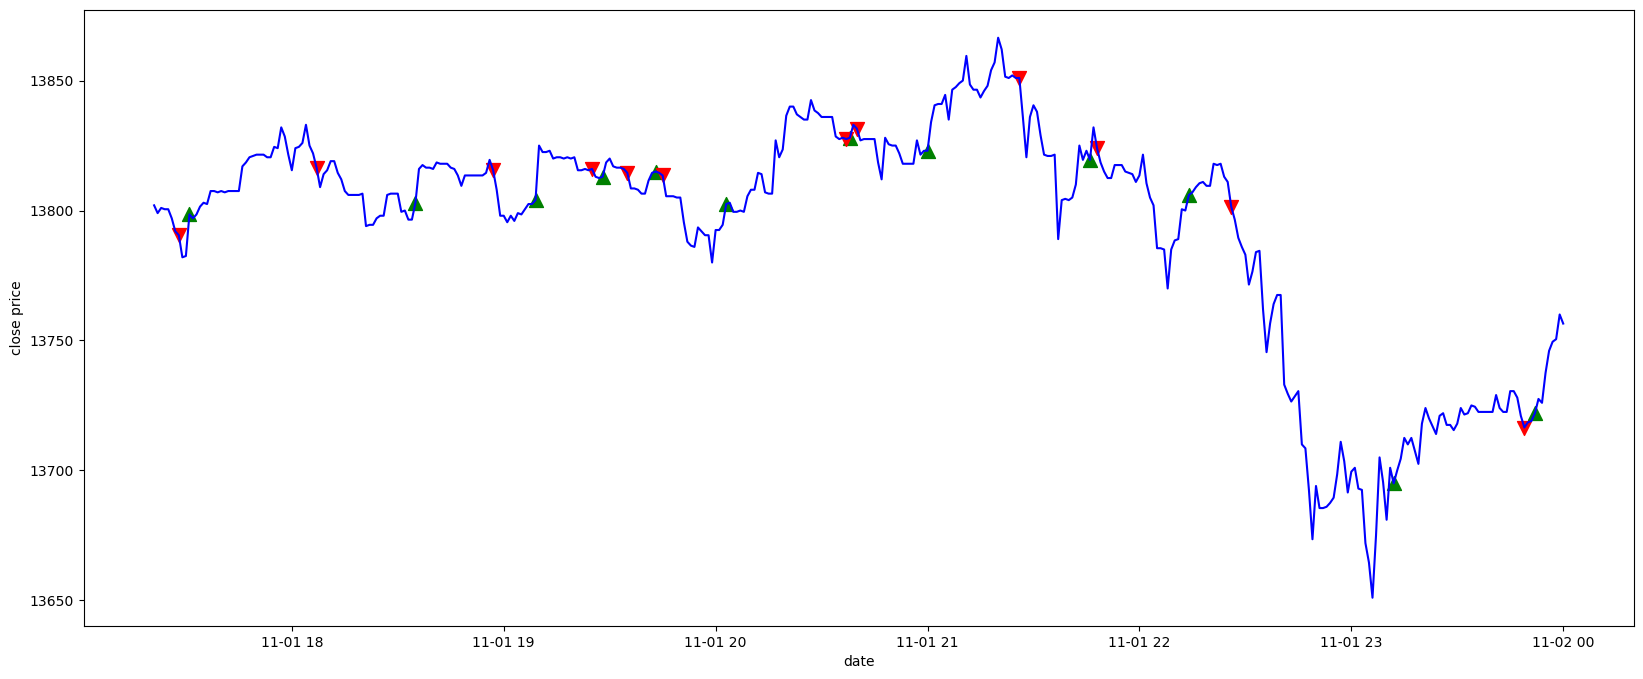

In [282]:
fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

ax.plot(df['time'], df['close'], 'b-')

ax.set_xlabel('date')
ax.set_ylabel('close price')
plt.scatter(df.time, buy_price, marker = '^', color = 'green', label = 'Buy', s = 100)
plt.scatter(df.time, sell_price, marker = 'v', color = 'red', label = 'Sell', s = 100)


plt.show()